

Graph- Distribution of customer's age and balance


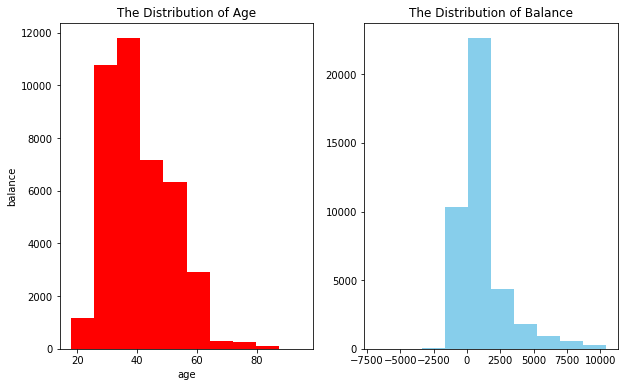

In [11]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from scipy.stats import zscore

dataset1 = pd.read_csv('/content/bank-full.csv', sep = ';')
#print(dataset1)

# DATA CLEANING
# deletinng the rows with poutcome=other
dataset2=dataset1.drop(dataset1[dataset1.poutcome=='other'].index,axis=0,inplace=False)
#print(dataset2)

#replacing 'unkown' in job column and education column with 'other'
#print(dataset2.job)
dataset2[['job','education']]=dataset2[['job','education']].replace(['unknown'],'other')
#print(dataset2)

#removing outliners ie. values that are more than three standard deviations away from the mean
dataset2[['balance']].mean()
dataset2['balance_outliers']=dataset2['balance']
dataset2['balance_outliers']=zscore(dataset2['balance_outliers'])

condition1=(dataset2['balance_outliers']>3) | (dataset2['balance_outliers']< -3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)
#print("d3: ",dataset3)
dataset4=dataset3.drop('balance_outliers',axis=1)
#print("d4:  ",dataset4)

#renaming columns y->response
dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)

#converting no->0 and yes->1
def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    dataset4[new_column].value_counts()#here we get the count of 0's and 1's

convert(dataset4, "response_binary", "response")

#droping contact column
dataset5 = dataset4.drop('contact', axis=1)
# changing  the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)
#changing 'month' from words to numbers 
lst = [dataset5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
#Droping rows that 'duration' less than 5seconds
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)
#Droping customer values with 'other' education
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis = 0, inplace = False)

# DATA ANALYSIS

print("\n\nGraph- Distribution of customer's age and balance")
dist_age_balance = plt.figure(figsize = (10,6))
a1 = dist_age_balance.add_subplot(1,2,1) 
a2 = dist_age_balance.add_subplot(1,2,2)
#print(dataset7)
a1.hist(dataset7['age'],color='red')
a1.set_title('The Distribution of Age')
a1.set_xlabel('age')
a2.hist(dataset7['balance'], color = 'skyblue')
a2.set_title('The Distribution of Balance')
a1.set_xlabel('age')
a1.set_ylabel('balance')
plt.show()
# '''
#  Maximum customers contacted are of the age 30's and 40's can be observed from the plot.
#  The distributioon of balance plot suggests that there is a huge standard deviation relative to the mean. 
# '''






Graph having the relationship between age of customer and their bank balance


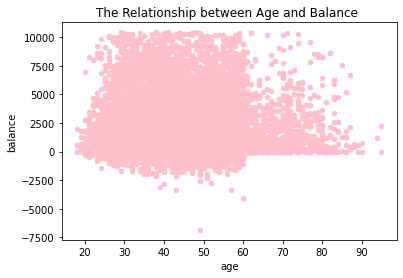

In [12]:
print("\n\nGraph having the relationship between age of customer and their bank balance")
scatter_age_balance = dataset7.plot.scatter('age','balance',color='pink')
plt.title('The Relationship between Age and Balance ')
plt.show()
# '''
#     from the graph we can infer that client's above the age of 60, have lower balance.  
# '''




 Graph shows if the client subscribed or not with the data(no. of calls and the duration of the call)


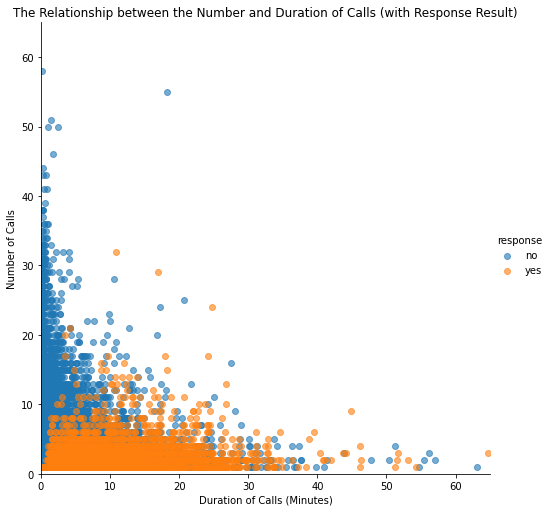

In [13]:
print("\n\n Graph shows if the client subscribed or not with the data(no. of calls and the duration of the call)")
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7,hue = 'response',fit_reg = False,scatter_kws={'alpha':0.6}, height =7)
plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')
plt.show()
# '''
#     We can observe that the subscription rate is high when the number of calls are less than 5 times and the duration of the call were long.
#     This suggests that the bank should avoid calling a client for more than five times, which can be disturbing and increase dissatisfaction.
# '''



 Graph- subscription rate and contacted rate by age group 


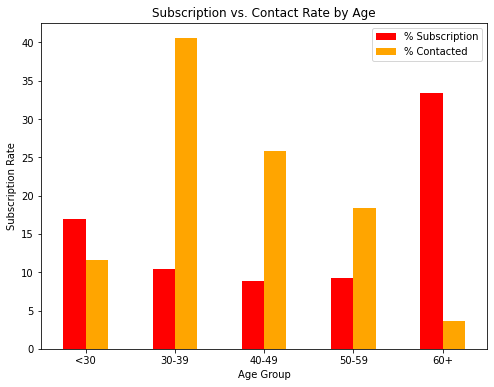

In [14]:
print("\n\n Graph- subscription rate and contacted rate by age group ")
lst = [dataset7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
count_age_response_pct = pd.crosstab(dataset7['response'],dataset7
['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 
age = pd.DataFrame(dataset7['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',figsize=(8,6), color = ('red','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()
# '''
# It can be observed that clients above the age of 60 have maximum subscription rate,and the second highest is of clients below 30.
# However the clients of age 30 to 50 are contacted the most.
# Thus,to make marketing campaign more effective, the bank should target younger and older clients.  
# '''



 Graph- subscription and contact rate by balance level


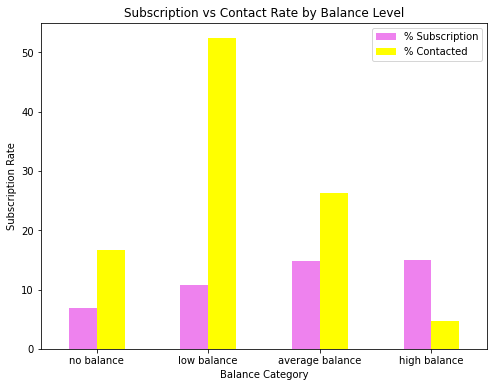

In [15]:
print("\n\n Graph- subscription and contact rate by balance level")
lst = [dataset7]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
count_balance_response_pct = pd.crosstab(dataset7['response'],dataset7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()
bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)
bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',color = ('violet','yellow'),figsize = (8,6))
plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')
plt.show()

# '''
#  Here clients are categorized into four groups base on balance level
#      1. no balance : clients with negative balance
#      2. low balance: balance between 0 and 1000 euros
#      3. avg balance: balance between 1000 and 5000 euros
#      4. high balance: balance greater than 5000 euros
     
# It can be observed that subscription rate increase with the balance level
# ie. customers with high balance have higher subscription rate.
# But the customers with low balance were contacted the highest.
# The bank must focus on high balance clients to secure more term deposits. 
# ''' 



Graph- subscription rate of clients in every age group with differnt balance levels


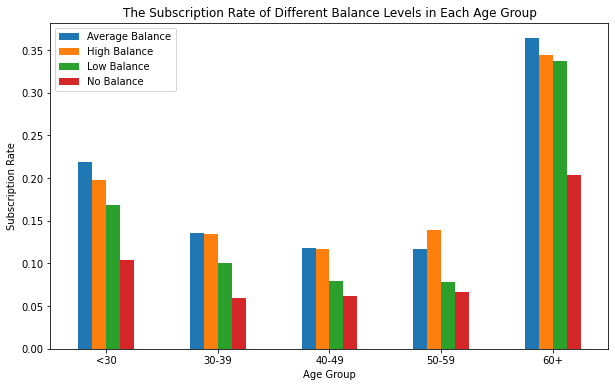

In [16]:
print("\n\nGraph- subscription rate of clients in every age group with differnt balance levels")
age_balance1 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response'].count())
age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)
age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

# '''From the graph it can be observed that the older clients have highest subscription rate followed by the youngest clients.
# The comman trend that can be observed is, the subscription rate increases with the balance.
# The bamnk must focous on clients above the age 60 and below 30, as they show higher subscription rates
# and positive bank balances.
# '''


Graph- Subscription rate of clients based on job


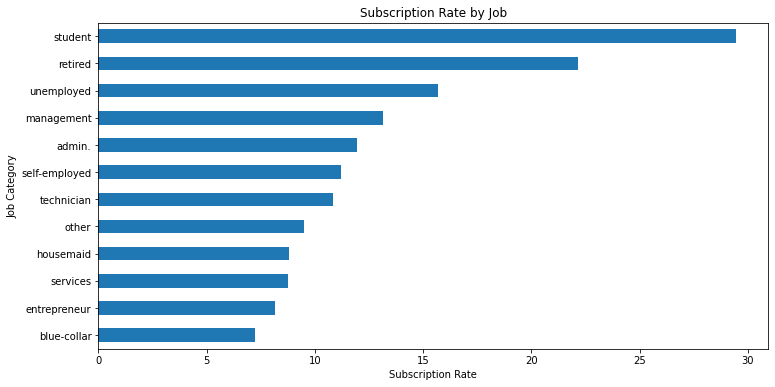

In [17]:
print("Graph- Subscription rate of clients based on job")
count_job_response_pct = pd.crosstab(dataset7['response'],dataset7['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
plt.show()
# '''
# again it is observed that studentsand retired have higher subscription rate ,
# ie. clients above 60years and mostly students are below 30years.

# '''

Graph-Subscription and contact rate based on month of the year


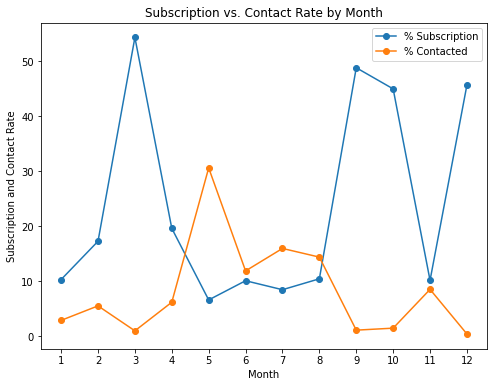

In [18]:
print("Graph-Subscription and contact rate based on month of the year") 
count_month_response_pct = pd.crosstab(dataset7['response'],dataset7['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(dataset7['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)
month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',figsize = (8,6),marker = 'o')
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
ticks = np.arange(1,13,1)
plt.xticks(ticks)
plt.show()
# '''
# It can be observed that the bank contacted the clients mostly during the months of may to august,
# while the subscription rates are high during the months September,October,December and 
# highest during March.
# This indicates that the bank has focused in the wrong months.
# '''